# Stack Overflow Annual Developer Survey 2019

> Stack Overlow is where everyone goes to get help. It is driven by the community of developers to help the community back.They conduct a survey every year and record all the information about the community and ofcourse the respondent's personal identifiable information is hidden. In 2019 they did it again, their website says the following.

*'with nearly 90,000 responses fielded from over 170 countries and dependent territories, our 2019 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software.'*


### Objective

From a data such as this, we can ask so many questions. However, I am going to keep it simple for this one and try to answer just **3** simple ones.
1. Who are the users of Stackoverflow in **2019** ?
2. How soon can one start contributing to **opensource** ?
3. How difficult is it to break into **AI** ?

### Get to know your data

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
survey2019 = pd.read_csv('../../developer_survey_data/survey_results_public.csv',encoding = "utf-8")

In [244]:
survey2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [245]:
survey2019_schema = pd.read_csv('../../developer_survey_data/survey_results_schema.csv')

def get_description(feature_name):
    '''
    input: enter feature name from the data
    output: return the description of the feature    
    
    '''
    print(survey2019_schema[survey2019_schema['Column']==feature_name]['QuestionText'].values[0])
    

In [246]:
#test the get_description function
get_description('Age')

What is your age (in years)? If you prefer not to answer, you may leave this question blank.


In [247]:
print('The Survey 2019 data contains : ')
print(' observations: ',survey2019.shape[0],'\n','features: ',survey2019.shape[1])

The Survey 2019 data contains : 
 observations:  88883 
 features:  85


In [248]:
survey2019.dtypes.value_counts()

object     79
float64     5
int64       1
dtype: int64

#### Visually inspecting for missing values

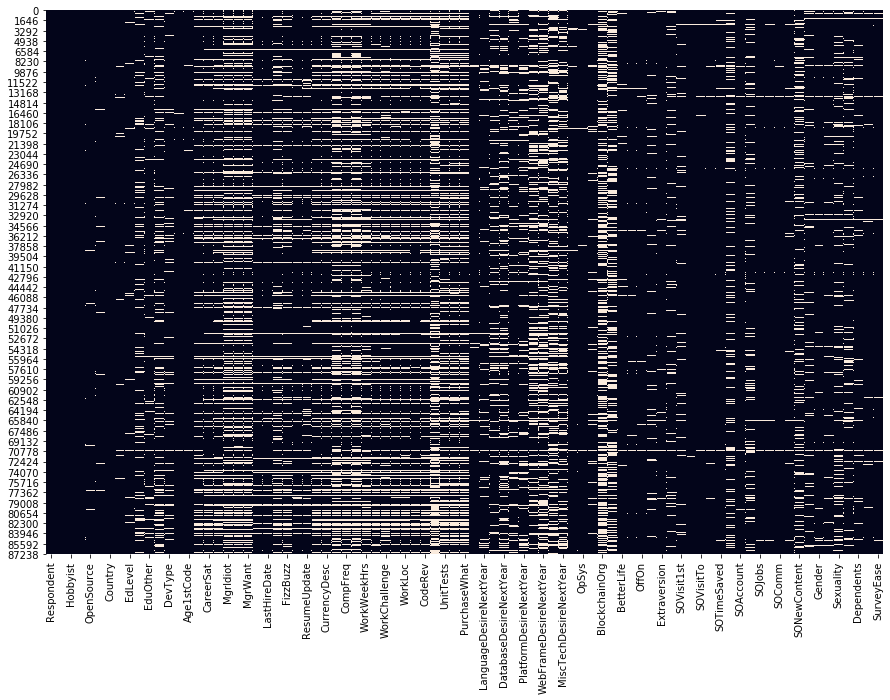

In [27]:
plt.figure(figsize = (15,10))
_ = sns.heatmap(survey2019.isnull(),cbar = False)

From the below graph, we know that there are lot of missing values in some of the features like `BlockchainOrg` and `CodeRevHrs` etc.
There are atleast many features that 

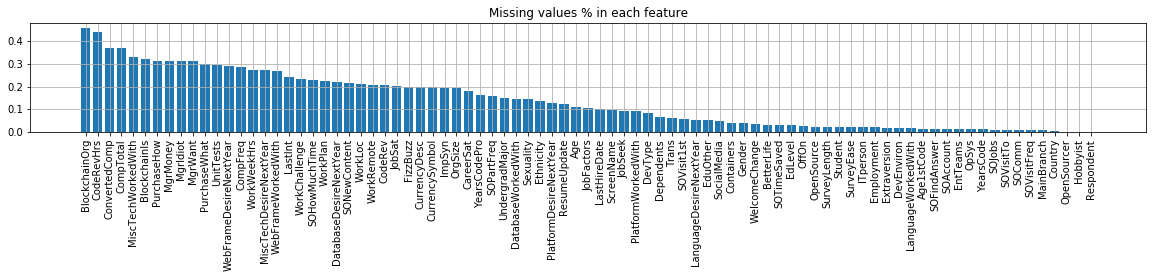

In [32]:
ismissing = survey2019.isnull().sum()
sum(ismissing[ismissing != 0])
ismissing = ismissing/len(survey2019)
ismissing.sort_values(ascending=False,inplace=True)

_ = plt.figure(figsize=(20,2))
plt.bar(ismissing.index,ismissing.values)
plt.xticks(rotation = 90)
plt.grid(True)
plt.title('Missing values % in each feature')
plt.show()

### Question 1: Who are the users of Stackoverflow in 2019 ?

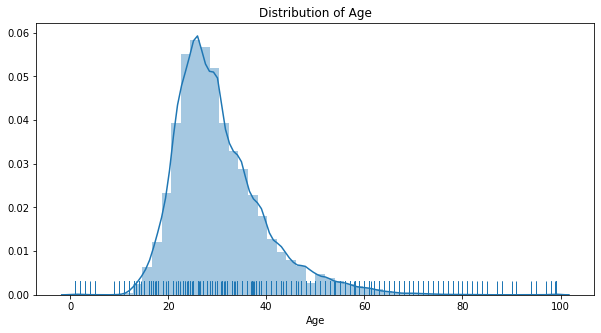

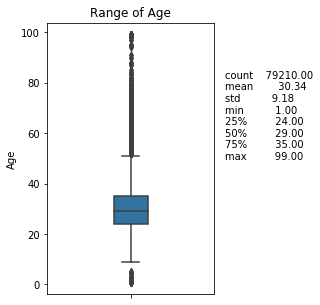

In [336]:

def plot_continous_feat(df,feat,rug = True,kde = True):
    
    '''
    input: dataframe and continous feature name (not for discrete feature)
    output: histogram nd boxplot for the continous variable 
    
    '''
    
    df_ = df[feat].dropna().astype(float)
    _ = plt.figure(figsize = (10,5))
    sns.distplot(df_,rug = rug,kde=kde)
    plt.title('Distribution of '+feat)
    
    
    plt.figure(figsize=(3,5))
    _ = sns.boxplot(df_,width = 0.2,orient = 'v')
    plt.figtext(0.95,0.5, round(df_.describe(),2).to_string())
    plt.title('Range of '+feat)
    plt.show()


plot_continous_feat(survey2019,'Age')

In [261]:
def casewhen_gender(feat):
    '''
    input: dataframe and the gender column
    output: return new categories
    '''
    
    if feat in ['Man']:
        return str('Man')
    elif feat in  ['Woman']:
        return str('Woman')
    else:
        return str('Others')

survey2019['Gender_new'] = survey2019['Gender'].apply(casewhen_gender)

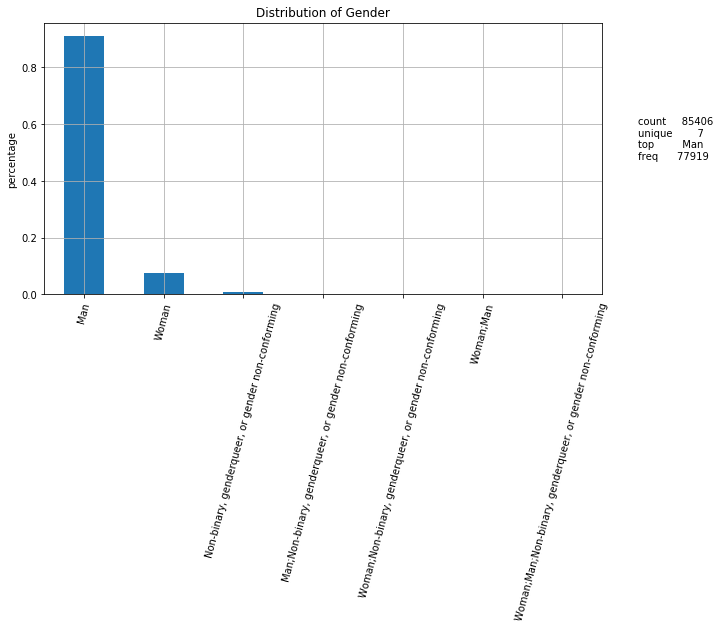

In [310]:
def plot_bar(df,feat,normalize = True):
    plt.figure(figsize = (10,5))
    _ = df[feat].value_counts(normalize = normalize).plot(kind = 'bar')
    if df[feat].dtype =='O':
        plt.figtext(0.95,0.5, df[feat].describe().to_string())
    else:
        plt.figtext(0.95,0.5, round(df[feat].describe(),2).to_string())
    plt.title('Distribution of '+feat)
    plt.xticks(rotation = 75)
    plt.ylabel('percentage')
    plt.grid(True)
    plt.show()

plot_bar(survey2019,'Gender')

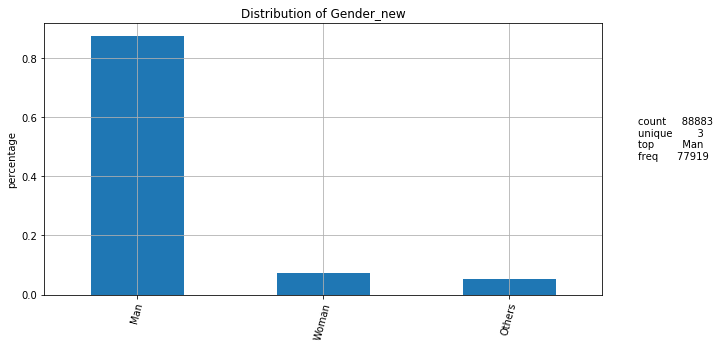

In [311]:
plot_bar(survey2019,'Gender_new')

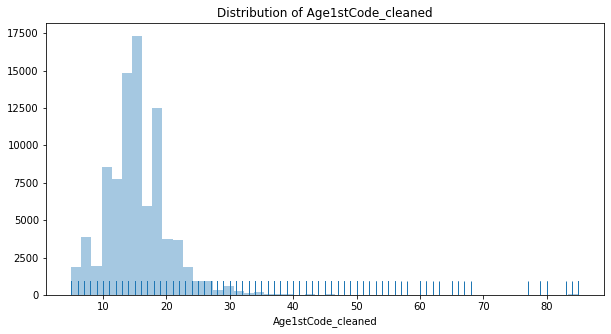

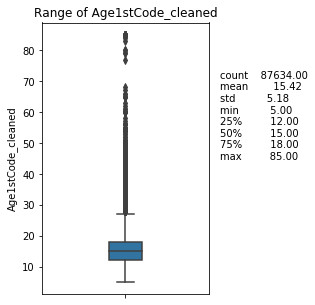

In [312]:
survey2019['Age1stCode_cleaned'] = survey2019['Age1stCode'].str.extract('(\d+)').astype(float)
plot_continous_feat(survey2019,'Age1stCode_cleaned',kde = False)

In [313]:
list(survey2019['LanguageWorkedWith'].unique())[:5]

#LanguageDesireNextYear

['HTML/CSS;Java;JavaScript;Python',
 'C++;HTML/CSS;Python',
 'HTML/CSS',
 'C;C++;C#;Python;SQL',
 'C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA']

In [314]:
survey2019['LanguageWorkedWith_new'] = survey2019['LanguageWorkedWith'].fillna('Others')
split_ = []
for i in range(len(survey2019)):
    split_.extend(survey2019['LanguageWorkedWith_new'][i].split(';'))

In [315]:
from collections import Counter
languages_ = pd.DataFrame.from_dict(Counter(split_),orient='index')
languages_.columns = ['frequency']
languages_.sort_values(by = 'frequency',ascending = False,inplace = True)

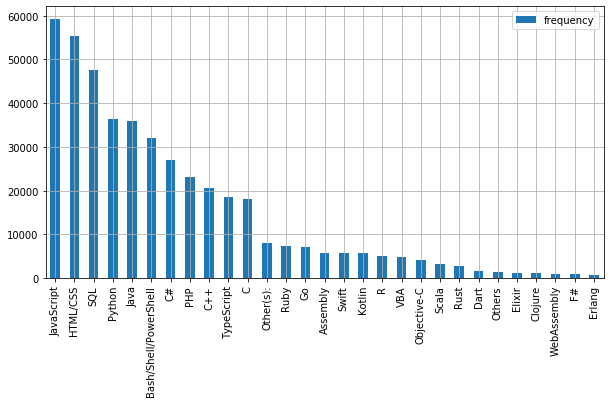

In [316]:
_ = languages_.plot(kind = 'bar',figsize = (10,5))
plt.grid(True)

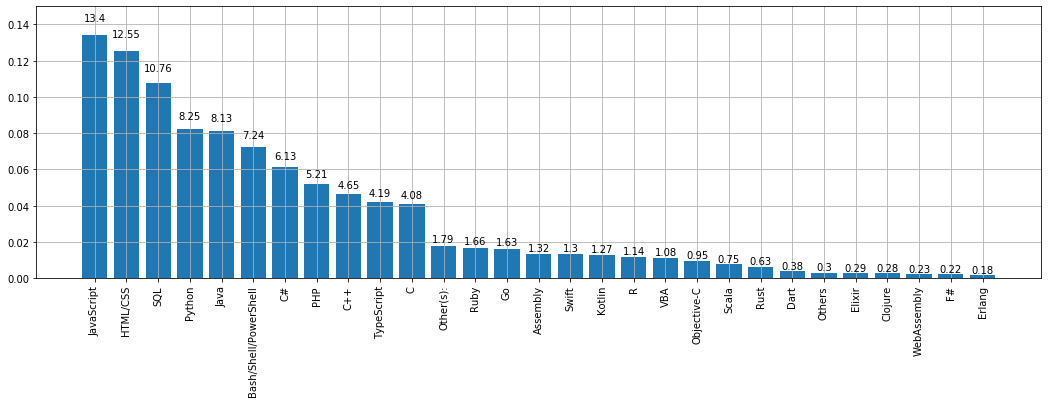

In [317]:
languages_['proportion'] = languages_['frequency']/languages_['frequency'].sum()
languages_.sort_values(by = 'proportion',ascending = False,inplace = True)
fig, ax = plt.subplots(figsize = (18,5))
rects = ax.bar(languages_.index,languages_['proportion'])
ax.tick_params(axis='x', rotation=90)
ax.set_ylim([0, 0.15])
ax.grid(True)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % round(height*100,2),
        ha='center', va='bottom')
autolabel(rects)        
plt.show()



### Question 2: How soon can one start contributing to **opensource** ?

To answer this question we need to ask few more questions.
* What is the age group of people who contribute to open source ?
* Are there students who contribute to opensource or is it just the professionals ?
* Whats the level of education of opensource contributers ?
* How much time opensource contributers devote to coding ?

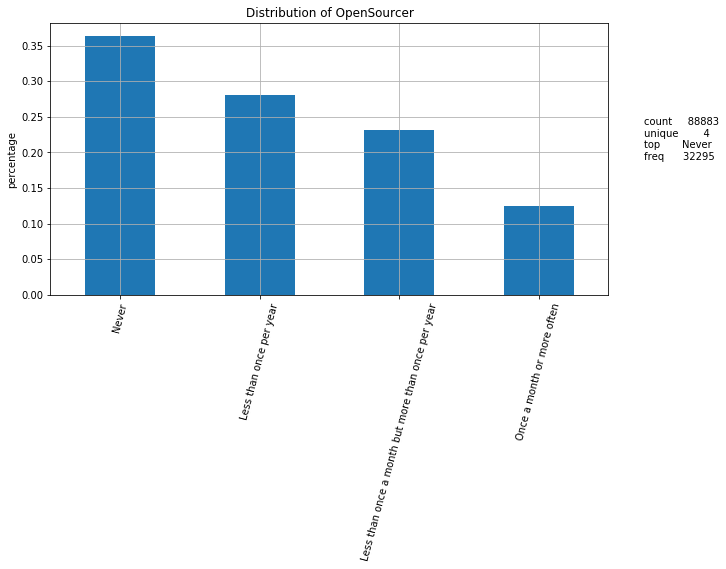

In [318]:
plot_bar(survey2019,'OpenSourcer')

In [319]:
survey2019['age_bin'] = pd.cut(survey2019['Age'],[0,10,20,30,60,80,100],labels=['0-10','10-20','20-30','30-60','60-80','80-100'])
opensourcer_ = survey2019.groupby(['age_bin','OpenSourcer'])['Respondent'].count()

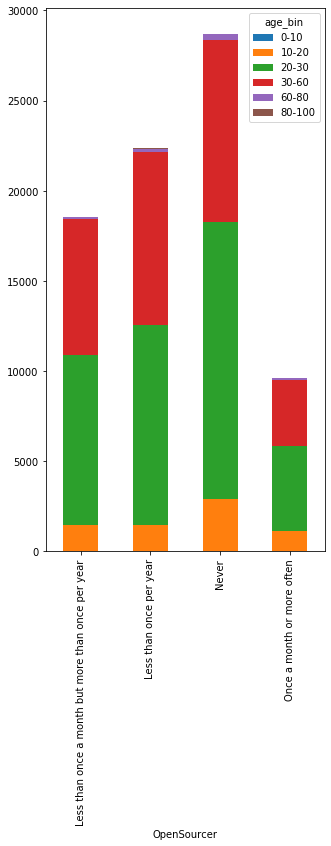

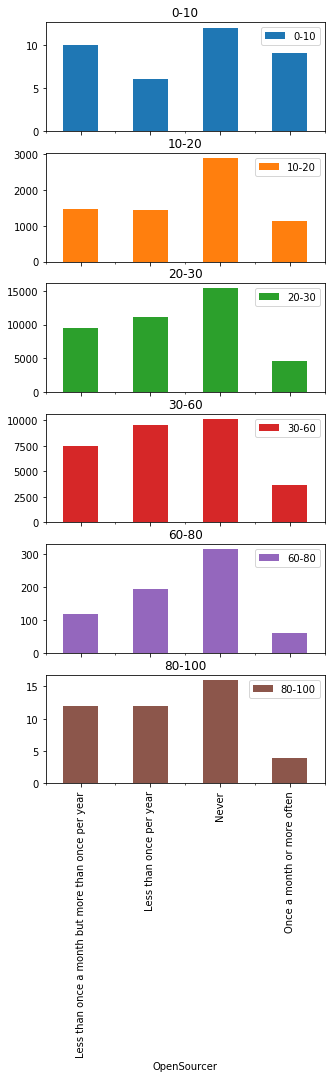

In [320]:
_ = opensourcer_.unstack(level=0).plot(kind='bar', stacked = True,figsize=(5,10))
_ = opensourcer_.unstack(level=0).plot(kind='bar', subplots = True,figsize=(5,14))


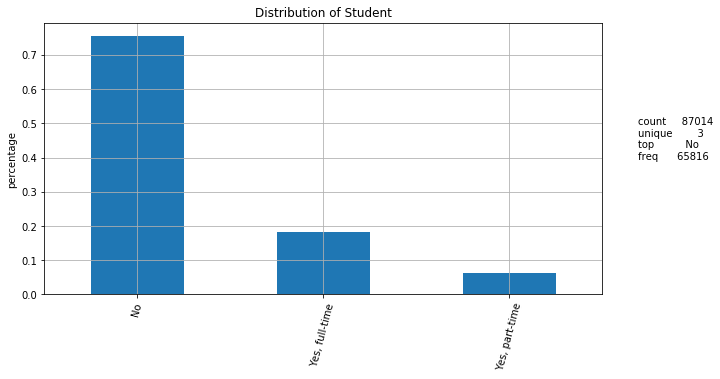

In [321]:
plot_bar(survey2019,'Student')

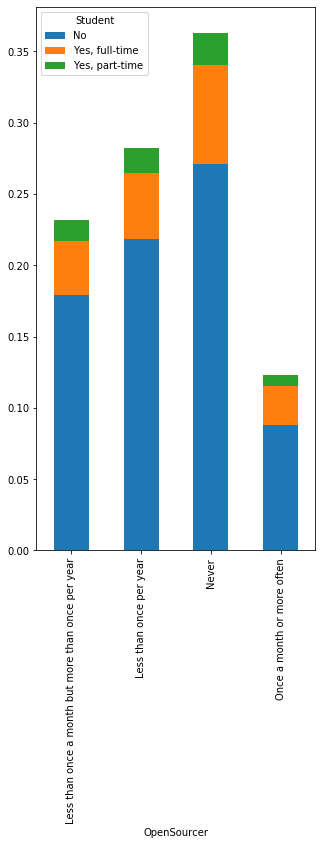

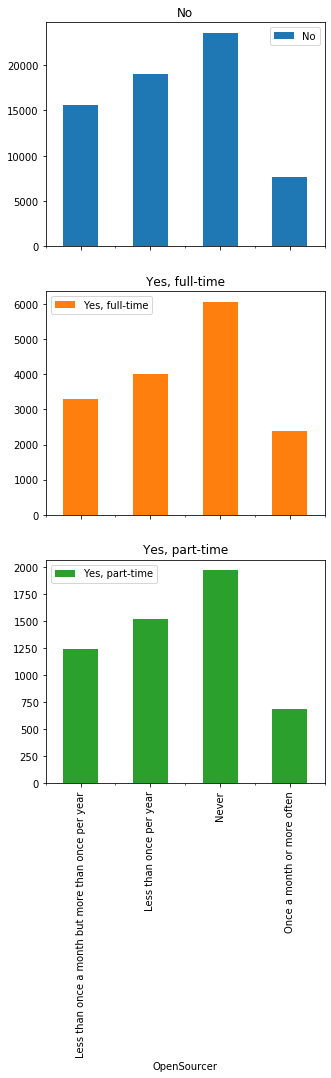

In [324]:
student_ops_ = survey2019.groupby(['Student','OpenSourcer'])['Respondent'].count()
student_ops_perc = student_opensourcer_.div(student_opensourcer_.sum())
_ = student_opensourcer_.unstack(level=0).plot(kind='bar', stacked = True,figsize=(5,10))
_ = student_ops_.unstack(level=0).plot(kind='bar', subplots = True,figsize=(5,14))



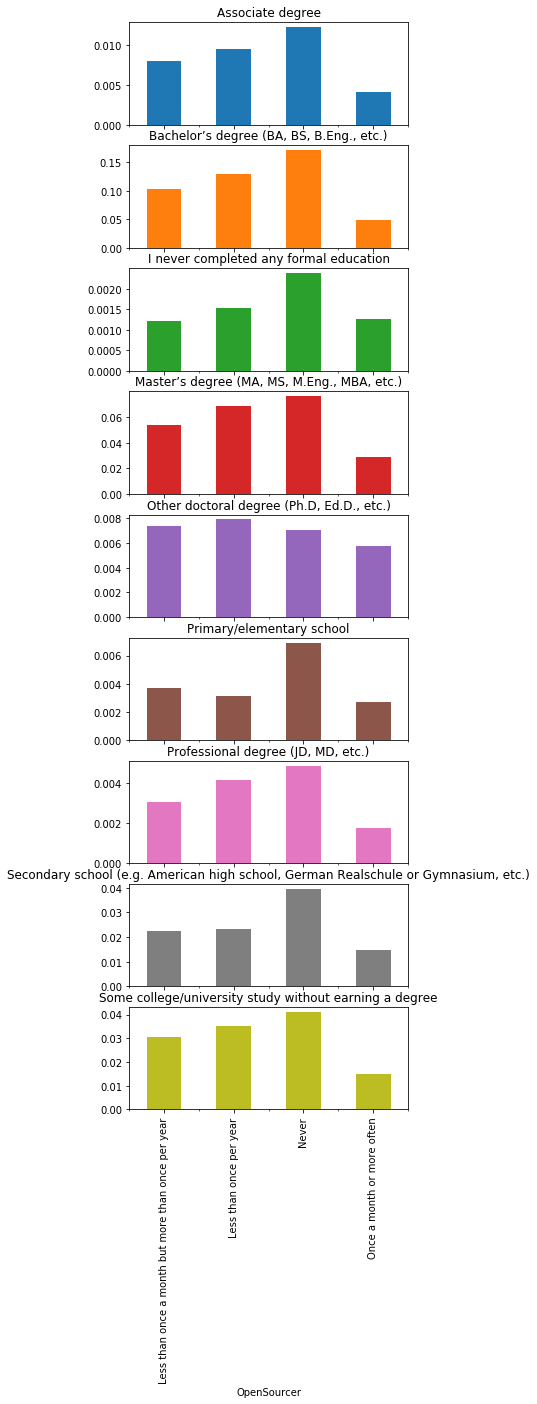

In [333]:
ed_ops_ = survey2019.groupby(['EdLevel','OpenSourcer'])['Respondent'].count()
ed_ops_perc_ = ed_ops_.div(ed_ops_.sum())
_ = ed_ops_perc_.unstack(level=0).plot(kind='bar', subplots = True,figsize=(5,20),legend = False)

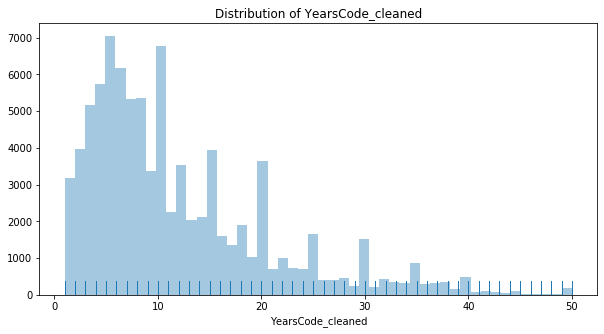

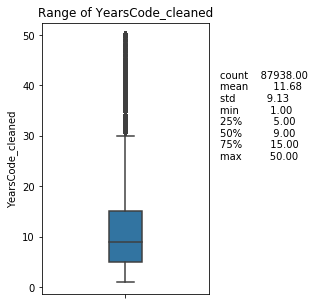

In [340]:
survey2019['YearsCode_cleaned'] = survey2019['YearsCode'].str.extract('(\d+)').astype(float)
plot_continous_feat(survey2019,'YearsCode_cleaned',kde = False)

In [341]:
survey2019['YearsCode_bin'] = pd.cut(survey2019['YearsCode_cleaned'],[0,3,5,10,30,50],labels=['0-3','3-5','5-10','10-30','30-50'])
coding_ops_ = survey2019.groupby(['YearsCode_bin','OpenSourcer'])['Respondent'].count()

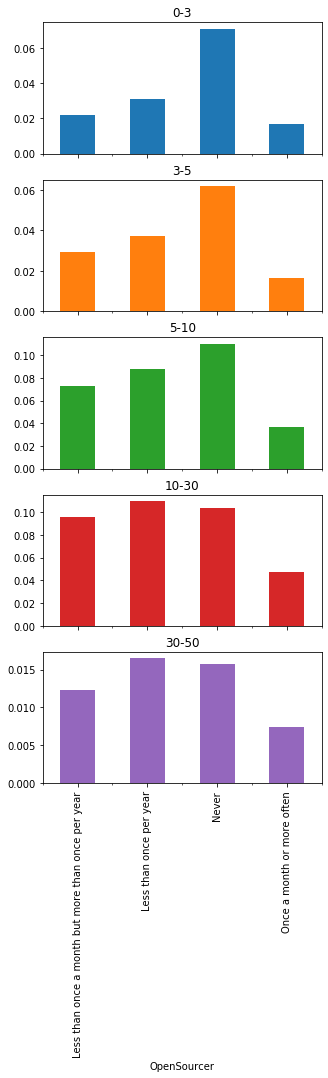

In [343]:
coding_ops_perc_ = coding_ops_.div(coding_ops_.sum())
_ = coding_ops_perc_.unstack(level=0).plot(kind='bar', subplots = True,figsize=(5,14),legend = False)